In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import gauss
% matplotlib inline

In [2]:
path = 'C:/Users/Taymour/Python For Finance/'

In [10]:
a = [gauss(1.5, 2) for i in range(1000000)] # generation of normally distributed randoms

In [12]:
import pickle
pkl_file = open(path + 'data.pkl', 'w')
          # open file for writing
          # Note: existing file might be overwritten

In [13]:
%time pickle.dump(a, pkl_file)

Wall time: 13.2 s


In [14]:
pkl_file

<open file 'C:/Users/Taymour/Python For Finance/data.pkl', mode 'w' at 0x0000000006466F60>

In [15]:
pkl_file.close()

In [17]:
pkl_file = open(path + 'data.pkl', 'r')  # open file for reading

In [18]:
%time b = pickle.load(pkl_file)

Wall time: 12.7 s


In [19]:
b[:5]

[2.3716375113651935,
 1.2842999852502128,
 0.2191292824557851,
 0.5165372989034644,
 2.864211445929661]

In [20]:
a[:5]

[2.3716375113651935,
 1.2842999852502128,
 0.2191292824557851,
 0.5165372989034644,
 2.864211445929661]

### To ensure that objects a and b are indeed the same

In [21]:
np.allclose(np.array(a), np.array(b))

True

In [22]:
np.sum(np.array(a) - np.array(b))

0.0

### Storing and retrieving a single object with pickle obviously is quite simple. What about two objects?

In [23]:
pkl_file = open(path + 'data.pkl', 'w')  # open file for writing

In [24]:
%time pickle.dump(np.array(a), pkl_file)

Wall time: 2.15 s


In [25]:
%time pickle.dump(np.array(a) ** 2, pkl_file)

Wall time: 2.01 s


In [26]:
pkl_file.close()

## What has happened? Mainly the following:

* We have written an ndarray version of the original object to disk.
* We have also written a squared ndarray version to disk, into the same file.
* Both operations were faster than the original operation (due to the use of ndarray objects).
* The file is approximately double the size as before, since we have stored double the amount of data.
### Let us read the two ndarray objects back into memory:

In [28]:
pkl_file = open(path + 'data.pkl', 'r')  # open file for reading

In [29]:
x = pickle.load(pkl_file)
x

array([ 2.37163751,  1.28429999,  0.21912928, ...,  0.36695882,
       -1.83024183,  1.81887009])

In [30]:
y = pickle.load(pkl_file)
y

array([5.62466449, 1.64942645, 0.04801764, ..., 0.13465878, 3.34978517,
       3.30828841])

In [31]:
pkl_file.close()

### sometimes helpful workaround is to not store single objects, but a dict object containing all the other objects: 

In [32]:
pkl_file = open(path + 'data.pkl', 'w')  # open file for writing
pickle.dump({'x' : x, 'y' : y}, pkl_file)
pkl_file.close()

In [33]:
pkl_file = open(path + 'data.pkl', 'r')  # open file for writing
data = pickle.load(pkl_file)
pkl_file.close()
for key in data.keys():
    print key, data[key][:4]

y [5.62466449 1.64942645 0.04801764 0.26681078]
x [2.37163751 1.28429999 0.21912928 0.5165373 ]


# READING AND WRITING TEXT FILES

In [34]:
rows = 5000
a = np.random.standard_normal((rows, 5))  # dummy data

In [35]:
a.round(4)

array([[-0.2231,  1.1187, -0.0613, -0.2112,  0.7205],
       [ 1.0452,  2.216 , -0.0192, -0.6928,  1.9191],
       [ 0.2205,  0.7202, -3.6285, -0.8147, -0.2164],
       ...,
       [-1.448 , -0.4311, -1.1319, -0.4646, -0.5013],
       [ 2.1544, -0.3316, -0.5765, -0.3657, -1.3723],
       [-1.26  , -1.2804,  1.3567,  0.0275,  0.4828]])

In [36]:
t = pd.date_range(start='2014/1/1', periods=rows, freq='H') # set of hourly datetime objects

In [37]:
t

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 01:00:00',
               '2014-01-01 02:00:00', '2014-01-01 03:00:00',
               '2014-01-01 04:00:00', '2014-01-01 05:00:00',
               '2014-01-01 06:00:00', '2014-01-01 07:00:00',
               '2014-01-01 08:00:00', '2014-01-01 09:00:00',
               ...
               '2014-07-27 22:00:00', '2014-07-27 23:00:00',
               '2014-07-28 00:00:00', '2014-07-28 01:00:00',
               '2014-07-28 02:00:00', '2014-07-28 03:00:00',
               '2014-07-28 04:00:00', '2014-07-28 05:00:00',
               '2014-07-28 06:00:00', '2014-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [38]:
csv_file = open(path + 'data.csv', 'w')  # open file for writing

In [39]:
header = 'date,no1,no2,no3,no4,no5\n'
csv_file.write(header)

In [40]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' % (t_, no1, no2, no3, no4, no5)
    csv_file.write(s)
csv_file.close()

In [41]:
csv_file = open(path + 'data.csv', 'r')  # open file for reading

In [42]:
for i in range(5):
    print csv_file.readline(),

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.223146,1.118735,-0.061288,-0.211233,0.720450
2014-01-01 01:00:00,1.045206,2.216019,-0.019220,-0.692789,1.919075
2014-01-01 02:00:00,0.220509,0.720174,-3.628515,-0.814662,-0.216357
2014-01-01 03:00:00,-0.688118,0.770319,-0.145225,0.044821,-0.217571


In [43]:
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines()
for line in content[:5]:
    print line,

date,no1,no2,no3,no4,no5
2014-01-01 00:00:00,-0.223146,1.118735,-0.061288,-0.211233,0.720450
2014-01-01 01:00:00,1.045206,2.216019,-0.019220,-0.692789,1.919075
2014-01-01 02:00:00,0.220509,0.720174,-3.628515,-0.814662,-0.216357
2014-01-01 03:00:00,-0.688118,0.770319,-0.145225,0.044821,-0.217571


In [44]:
csv_file.close()

# SQL DATABASES --  SQLite3

In [2]:
import sqlite3 as sq3

In [3]:
query = 'CREATE TABLE numbs (Date date, No1 real, No2 real)'

In [4]:
con = sq3.connect(path + 'numbs.db')

In [5]:
con.execute(query)

In [6]:
con.commit()

In [8]:
import datetime as dt

In [9]:
con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
            (dt.datetime.now(), 0.12, 7.3))

In [10]:
data = np.random.standard_normal((10000, 2)).round(5)

In [11]:
for row in data:
    con.execute('INSERT INTO numbs VALUES(?, ?, ?)',
                (dt.datetime.now(), row[0], row[1]))
con.commit()

In [12]:
con.execute('SELECT * FROM numbs').fetchmany(10)

[(u'2018-08-05 21:33:04.084000', 0.12, 7.3),
 (u'2018-08-05 21:35:12.584000', 2.02052, 0.49454),
 (u'2018-08-05 21:35:12.584000', -0.14516, -0.4257),
 (u'2018-08-05 21:35:12.585000', -0.05918, -0.92377),
 (u'2018-08-05 21:35:12.585000', 1.48571, -1.4796),
 (u'2018-08-05 21:35:12.585000', 0.9294, 1.14395),
 (u'2018-08-05 21:35:12.585000', -0.86363, -0.81068),
 (u'2018-08-05 21:35:12.585000', 0.54306, -0.08901),
 (u'2018-08-05 21:35:12.585000', -0.01037, -0.61556),
 (u'2018-08-05 21:35:12.585000', 0.96521, 0.13113)]

In [13]:
pointer = con.execute('SELECT * FROM numbs')

In [17]:
for i in range(3):
    print pointer.fetchone()

(u'2018-08-05 21:35:12.585000', -0.86363, -0.81068)
(u'2018-08-05 21:35:12.585000', 0.54306, -0.08901)
(u'2018-08-05 21:35:12.585000', -0.01037, -0.61556)


In [18]:
con.close()

# WRITING AND READING NUMPY ARRAYS

In [19]:
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00',
                   dtype='datetime64[m]')  # minute intervals
len(dtimes)

3681360

In [21]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')])
data = np.zeros(len(dtimes), dtype=dty)

In [22]:
data['Date'] = dtimes

In [23]:
a = np.random.standard_normal((len(dtimes), 2)).round(5)
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

In [24]:
%time np.save(path + 'array', data)  # suffix .npy is added

Wall time: 807 ms


In [25]:
%time np.load(path + 'array.npy')

Wall time: 113 ms


array([('2015-01-01T10:00', -2.28935, -0.41141),
       ('2015-01-01T10:01',  0.5211 ,  1.30347),
       ('2015-01-01T10:02',  0.4264 , -0.48171), ...,
       ('2021-12-31T21:57',  1.69954, -0.34866),
       ('2021-12-31T21:58',  0.34063, -0.03309),
       ('2021-12-31T21:59',  0.75698,  0.16196)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [26]:
%time np.load(path + 'array.npy')

Wall time: 97 ms


array([('2015-01-01T10:00', -2.28935, -0.41141),
       ('2015-01-01T10:01',  0.5211 ,  1.30347),
       ('2015-01-01T10:02',  0.4264 , -0.48171), ...,
       ('2021-12-31T21:57',  1.69954, -0.34866),
       ('2021-12-31T21:58',  0.34063, -0.03309),
       ('2021-12-31T21:59',  0.75698,  0.16196)],
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [27]:
data = 0.0

In [3]:
import numpy as np
import pandas as pd
data = np.random.standard_normal((1000000, 5)).round(5) # sample data set

In [4]:
filename = path + 'numbs'

In [5]:
import sqlite3 as sq3

In [6]:
query = 'CREATE TABLE numbers (No1 real, No2 real,\
No3 real, No4 real, No5 real)'

In [7]:
con = sq3.Connection(filename + '.db')

In [8]:
con.execute(query)

In [9]:
%%time
con.executemany('INSERT INTO numbers VALUES (?, ?, ?, ?, ?)', data)
con.commit()

Wall time: 34.4 s


### Reading of the whole table into a list object is much faster:

In [11]:
%%time
temp = con.execute('SELECT * FROM numbers').fetchall()
print temp[:2]
temp = 0.0

[(-0.66823, -0.28156, 0.13677, -0.13618, -0.12983), (-0.67108, -1.25885, -0.36279, 0.59568, -0.09632)]
Wall time: 3.68 s


In [12]:
%%time
query = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(query).fetchall()).round(3)

Wall time: 1.54 s


(-4.5, 0.5)

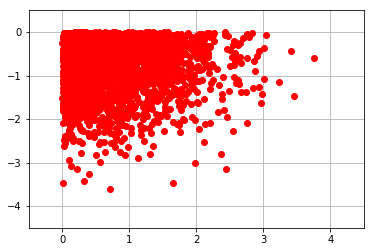

In [13]:
res = res[::100]  # every 100th result
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:, 0], res[:, 1], 'ro')
plt.grid(True); plt.xlim(-0.5, 4.5); plt.ylim(-4.5, 0.5)

# From SQL to pandas

In [14]:
import pandas.io.sql as pds

In [15]:
%time data = pds.read_sql('SELECT * FROM numbers', con)

Wall time: 5.24 s


In [16]:
data.head()

,No1,No2,No3,No4,No5
0,-0.66823,-0.28156,0.13677,-0.13618,-0.12983
1,-0.67108,-1.25885,-0.36279,0.59568,-0.09632
2,-0.14668,1.25874,0.65581,0.60444,2.16779
3,-2.13398,-0.06530,0.04261,-1.85596,-1.31389
4,1.31278,-0.68029,0.13108,1.27915,-1.74293


In [17]:
%time data[(data['No1'] > 0) & (data['No2'] < 0)].head()

Wall time: 62 ms


,No1,No2,No3,No4,No5
4,1.31278,-0.68029,0.13108,1.27915,-1.74293
5,1.40310,-1.20411,0.25023,1.96023,-1.54891
8,1.24523,-0.52974,1.58070,-0.98406,-0.36784
25,0.25708,-0.53380,-0.86998,-0.17628,-0.28322
28,1.56436,-0.13963,-0.62438,1.17586,0.33367


In [18]:
%%time
res = data[['No1', 'No2']][((data['No1'] > 0.5) | (data['No1'] < -0.5))
                           & ((data['No2'] < -1) | (data['No2'] > 1))]

Wall time: 105 ms


(-5.04946, 4.98012, -5.0376065, 5.4026365)

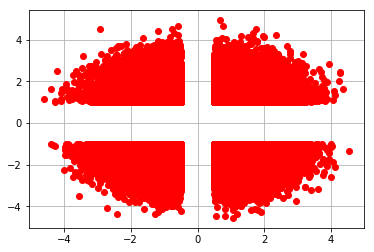

In [19]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True); plt.axis('tight')

In [22]:
h5s = pd.HDFStore(filename + '.h5s', 'w')

In [23]:
%time h5s['data'] = data

Wall time: 742 ms


In [24]:
h5s

<class 'pandas.io.pytables.HDFStore'>
File path: C:/Users/Taymour/Python For Finance/numbs.h5s

In [25]:
h5s.close()

In [26]:
%%time
h5s = pd.HDFStore(filename + '.h5s', 'r')
temp = h5s['data']
h5s.close()

Wall time: 134 ms


#### Brief check of whether the data sets are indeed the same:

In [27]:
np.allclose(np.array(temp), np.array(data))

True

In [28]:
temp = 0.0

# DATA AS CSV FILE

In [29]:
%time data.to_csv(filename + '.csv')

Wall time: 12.9 s


Wall time: 3.68 s


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E6DFF28>,
      dtype=object)

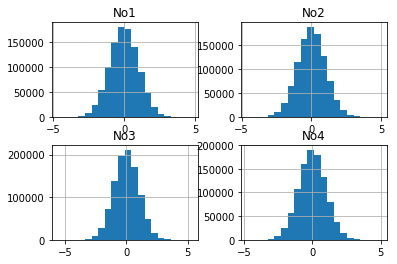

In [32]:
%%time
pd.read_csv(filename + '.csv')[['No1', 'No2',
                                'No3', 'No4']].hist(bins=20)

# DATA AS EXCEL FILE

In [34]:
%time data[:100000].to_excel(filename + '.xlsx')

Wall time: 1min 45s


Wall time: 35.2 s


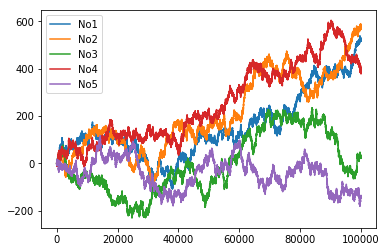

In [36]:
%time pd.read_excel(filename + '.xlsx', 'Sheet1').cumsum().plot()

# Fast I/O with PyTables

In [37]:
import numpy as np
import tables as tb
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
filename = path + 'tab.h5'
h5 = tb.open_file(filename, 'w')

In [40]:
rows = 2000000

In [39]:
row_des = {
    'Date': tb.StringCol(26, pos=1),
    'No1': tb.IntCol(pos=2),
    'No2': tb.IntCol(pos=3),
    'No3': tb.Float64Col(pos=4),
    'No4': tb.Float64Col(pos=5)
}

In [41]:
filters = tb.Filters(complevel=0)  # no compression
tab = h5.create_table('/', 'ints_floats', row_des,
                      title='Integers and Floats',
                      expectedrows=rows, filters=filters)

In [42]:
tab

/ints_floats (Table(0,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [43]:
pointer = tab.row

In [44]:
ran_int = np.random.randint(0, 10000, size=(rows, 2))
ran_flo = np.random.standard_normal((rows, 2)).round(5)

In [45]:
%%time
for i in range(rows):
    pointer['Date'] = dt.datetime.now()
    pointer['No1'] = ran_int[i, 0]
    pointer['No2'] = ran_int[i, 1]
    pointer['No3'] = ran_flo[i, 0]
    pointer['No4'] = ran_flo[i, 1]
    pointer.append()
    # this appends the data and moves the pointer one row forward
tab.flush()

Wall time: 40.9 s


In [46]:
tab

/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [47]:
dty = np.dtype([('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'),
                ('No3', '<f8'), ('No4', '<f8')])
sarray = np.zeros(len(ran_int), dtype=dty)

In [48]:
sarray

array([('', 0, 0, 0., 0.), ('', 0, 0, 0., 0.), ('', 0, 0, 0., 0.), ...,
       ('', 0, 0, 0., 0.), ('', 0, 0, 0., 0.), ('', 0, 0, 0., 0.)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [49]:
%%time
sarray['Date'] = dt.datetime.now()
sarray['No1'] = ran_int[:, 0]
sarray['No2'] = ran_int[:, 1]
sarray['No3'] = ran_flo[:, 0]
sarray['No4'] = ran_flo[:, 1]

Wall time: 338 ms


In [50]:
%%time
h5.create_table('/', 'ints_floats_from_array', sarray,
                title='Integers and Floats',
                expectedrows=rows, filters=filters)

Wall time: 312 ms


/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [51]:
h5

File(filename=C:/Users/Taymour/Python For Finance/tab.h5, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/ints_floats (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)
/ints_floats_from_array (Table(2000000,)) 'Integers and Floats'
  description := {
  "Date": StringCol(itemsize=26, shape=(), dflt='', pos=0),
  "No1": Int32Col(shape=(), dflt=0, pos=1),
  "No2": Int32Col(shape=(), dflt=0, pos=2),
  "No3": Float64Col(shape=(), dflt=0.0, pos=3),
  "No4": Float64Col(shape=(), dflt=0.0, pos=4)}
  byteorder := 'little'
  chunkshape := (2621,)

In [52]:
h5.remove_node('/', 'ints_floats_from_array')

In [53]:
tab[:3]

array([('2018-08-06 11:10:05.869000', 7956, 6942,  0.56762,  1.16972),
       ('2018-08-06 11:10:05.869000', 3505,  396, -0.5698 , -1.18399),
       ('2018-08-06 11:10:05.869000', 5452, 2736,  0.33193, -1.24622)],
      dtype=[('Date', 'S26'), ('No1', '<i4'), ('No2', '<i4'), ('No3', '<f8'), ('No4', '<f8')])

In [54]:
tab[:4]['No4']

array([ 1.16972, -1.18399, -1.24622,  0.37274])

In [55]:
%time np.sum(tab[:]['No3'])

Wall time: 287 ms


-2849.652209999999

In [56]:
%time np.sum(np.sqrt(tab[:]['No1']))

Wall time: 360 ms


133304489.71360062

2000000
Wall time: 962 ms


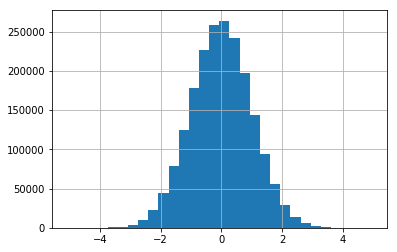

In [57]:
%%time
plt.hist(tab[:]['No3'], bins=30)
plt.grid(True)
print len(tab[:]['No3'])

In [58]:
%%time
res = np.array([(row['No3'], row['No4']) for row in
                tab.where('((No3 < -0.5) | (No3 > 0.5)) \
                & ((No4 < -1) | (No4 > 1))')])[::100]

Wall time: 1.35 s


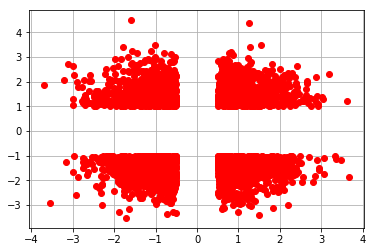

In [59]:
plt.plot(res.T[0], res.T[1], 'ro')
plt.grid(True)

In [60]:
%%time
values = tab.cols.No3[:]
print "Max %18.3f" % values.max()
print "Ave %18.3f" % values.mean()
print "Min %18.3f" % values.min()
print "Std %18.3f" % values.std()

Max              4.952
Ave             -0.001
Min             -5.079
Std              1.000
Wall time: 504 ms


In [61]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('((No1 > 9800) | (No1 < 200)) \
           & ((No2 > 4500) & (No2 < 5500))')]
for res in results[:4]:
    print res

(118, 5446)
(9972, 5499)
(125, 5464)
(9888, 5155)
Wall time: 308 ms


In [62]:
%%time
results = [(row['No1'], row['No2']) for row in
           tab.where('(No1 == 1234) & (No2 > 9776)')]
for res in results:
    print res

(1234, 9976)
(1234, 9899)
(1234, 9966)
(1234, 9940)
(1234, 9872)
Wall time: 257 ms
